# Spatialisation methods for hail detection

## A.Imports

In [5]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
import warnings
warnings.filterwarnings("ignore")

In [2]:
! git clone https://github.com/nanopiero/spatialisation_grele
sys.path.append('spatialisation_grele')

Cloning into 'spatialisation_grele'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 42 (delta 24), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (42/42), 393.87 KiB | 3.86 MiB/s, done.
Resolving deltas: 100% (24/24), done.


In [3]:
from utils import HailDataset, plot_images_and_reports

## B. Terms of the machine learning problem

The main tool is the PyTorch customized dataset `HailDataset()`. `HailDataset()` generates on the fly six consecutive pseudo-radar images  and hail reports.

The consecutive pseudo-radar images contain elliptic rain cells. They are stored in 6-channel torch arrays of size `6 x S x S` (e.g., the torch array **images** below). The reports are the non-zero values (hail size in *m.*) stored in one array of size `S x S` (the torch array **reports**).

`HailDataset` has two options:

1. **To get small (S=64) images centered on a moving cell, pass:**

   ```python
   HailDataset(centered=True)
   ```

   In this case, the reports are related to the cell that lies in the center of the images. Please note that when there is no report (i.e., `reports == 0` on every pixel for every channel), the center cell didn't yield hail for sure. There could be other cells on the pseudo-radar images, and those cells possibly yield hail. However, there is no report coming from those cells in the array **reports**.

2. **To get larger images (S=172) that are not centered, pass:**

   ```python
   HailDataset(centered=False)
   ```

In this case, the reports could be related to any of the hailing cells. The absence of reports does not necessarily mean that there is no hail.

In [7]:
# Example with centered images:
haildataset = HailDataset(centered=True)
batch_size = 64
num_workers = 2

# Compilation will take about 1 min
dataloader = DataLoader(haildataset, batch_size=batch_size, num_workers=num_workers)
images, reports = next(iter(dataloader))

In [9]:
%%timeit -n 1 -r 1
# test browse the dataset for one epoch (100 mini-batches of size 64)
for i, (images, reports) in enumerate(dataloader):
  pass

12.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


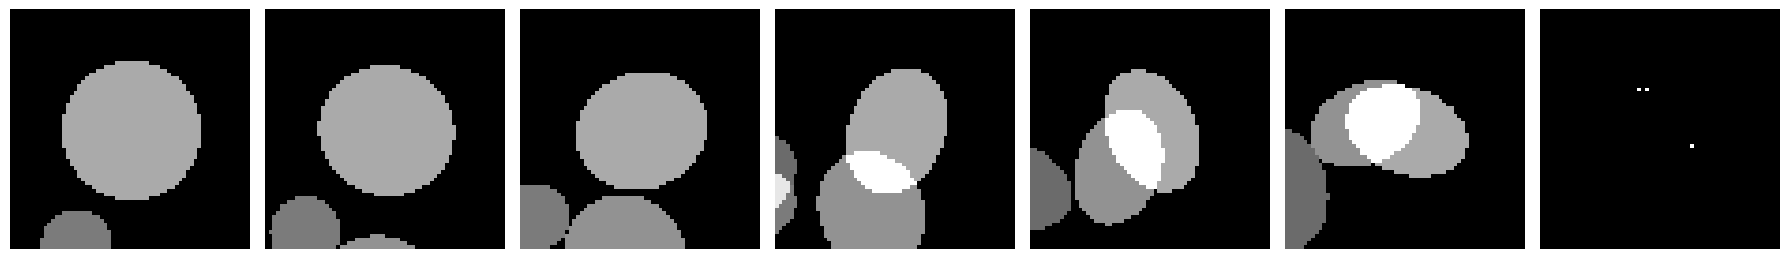

In [21]:
# plot 6 consectutive pseudo-radar images and related reports from the k th element of the mini-batch
k = 11
img = torch.tensor(images[k,...])
rpt = torch.tensor(reports[k,...])
plot_images_and_reports(img, rpt)

In [23]:
# Example with centered=False:
haildataset = HailDataset(centered=False)
dataloader = DataLoader(haildataset, batch_size=batch_size, num_workers=num_workers)
images, reports = next(iter(dataloader))

In [24]:
%%timeit -n 1 -r 1
# test browse the dataset for one epoch (100 mini-batches of size 64)
for i, (images, reports) in enumerate(dataloader):
  pass

1min 30s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


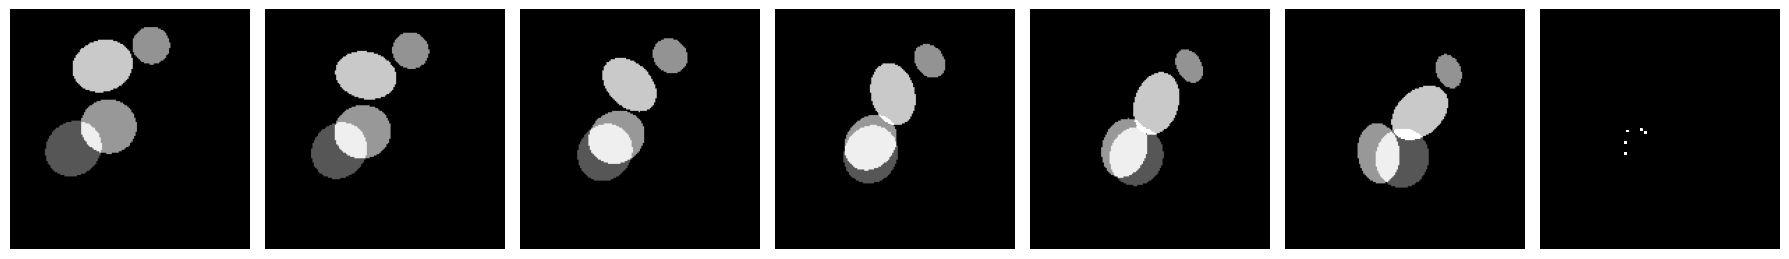

In [25]:
k = 11
img = torch.tensor(images[k,...])
rpt = torch.tensor(reports[k,...])
plot_images_and_reports(img, rpt)